1. Take iris flowers data set and reduced the 4D into 2D using PCA.Then train your model and predict a new flower with given measurements.

# Reducing Dimensionality from 4D to 2D

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()
x = iris.data
y = iris.target

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
# Create covariance matrix from the scaled data
rows = x_scaled.T 
covariance_matrix = np.cov(rows)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [6]:
# creating the eigen value and vector
eig_vals,eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [7]:
# find the top two highest eigen values
# Find the highest eigen values
for i in range(len(eig_vals)):
    print('Eigenvalue {}: {}'.format(i+1, eig_vals[i]/sum(eig_vals)))

Eigenvalue 1: 0.7296244541329989
Eigenvalue 2: 0.22850761786701754
Eigenvalue 3: 0.03668921889282865
Eigenvalue 4: 0.005178709107154905


In [8]:
pc1 = x_scaled.dot(eig_vecs.T[0]) # take 0th Row as Eigen Vector
pc2= x_scaled.dot(eig_vecs.T[1]) # take 1th Row as Eigen Vector
# this eigen vaectors are called principal component 1 and principal component 2

In [9]:
df = pd.DataFrame(pc1,columns=['PC1'])
df['PC2'] = pc2
df['target'] = y
df.head()

,PC1,PC2,target
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


In [10]:
import seaborn as sns 

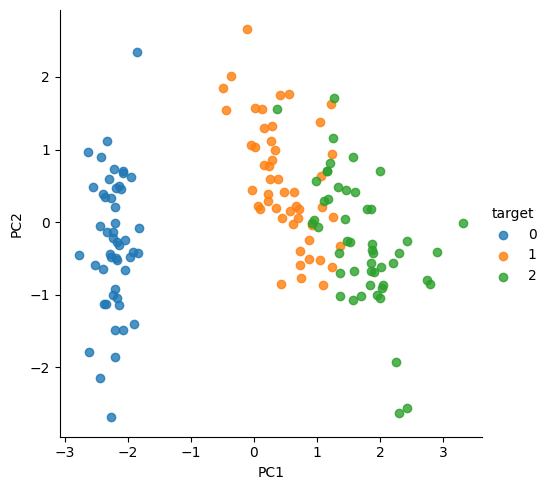

In [11]:
sns.lmplot(data=df,x = 'PC1',y = 'PC2',fit_reg=False,hue='target')

# Using PCA 

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2) # reduce dimensionality to 2

In [14]:
projected_x = pca.fit_transform(x_scaled)

In [15]:
projected_x

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [27]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [16]:
pc1 = projected_x[:,0]
pc2 = projected_x[:,1]


In [17]:
df1 = pd.DataFrame(pc1,columns=['PC1'])
df1['PC2'] = pc2
df1['target'] = y

In [18]:
df1

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


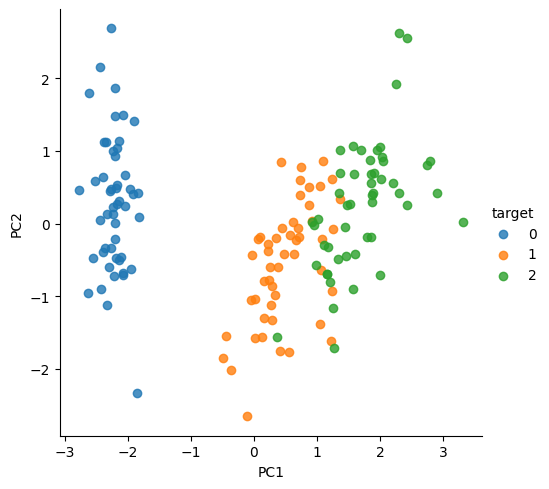

In [19]:
sns.lmplot(data=df1,x='PC1',y='PC2',fit_reg=False,hue='target')

In [20]:
x = df1[['PC1','PC2']]
y = df1['target'].values

In [21]:
x

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
# Using SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [25]:
svc.score(x_test,y_test)

0.9333333333333333

In [26]:
# predict
inputs = np.array([[6.6,3.0,4.4,1.4]])
scaled = scaler.transform(inputs)
pca_inputs = pca.transform(scaled)
svc.predict(pca_inputs)

array([1])